In [1]:
from mtcnn import MTCNN
import cv2
import numpy as np
from matplotlib import pyplot as plt

detector = MTCNN()

plt.rcParams['figure.figsize'] = [12, 8]

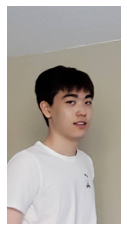

In [30]:
# load a sample image
img = cv2.cvtColor(cv2.imread("test_face_4.jpg"), cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

[{'box': [566, 918, 515, 705], 'confidence': 0.9999923706054688, 'keypoints': {'left_eye': (787, 1182), 'right_eye': (1000, 1192), 'nose': (943, 1315), 'mouth_left': (807, 1444), 'mouth_right': (975, 1447)}}]


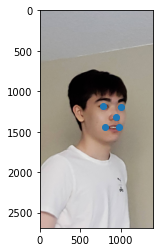

In [31]:
# get face detection output, print details, and display keypoints
out = detector.detect_faces(img)
print(out)

plt.imshow(img)
for face in out:
    pts = list(face['keypoints'].values())
    plt.scatter([pt[0] for pt in pts], [pt[1] for pt in pts])

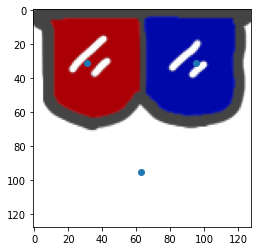

In [32]:
# load filter
en_filt = cv2.cvtColor(cv2.imread('en_glasses.png', cv2.IMREAD_UNCHANGED), cv2.COLOR_BGRA2RGBA)

plt.imshow(en_filt) 
plt.scatter([31, 63, 95], [31, 95, 31]) # alignment points

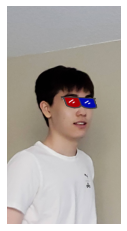

In [33]:
# fit filter to face
filt_pts = np.array([[31, 31], [63, 95], [95, 31]], dtype=np.float32)

plt.axis('off')
plt.imshow(img)

for face in out:
    pts = list(face['keypoints'].values())
    img_pts = np.ones((3,2), dtype=np.float32)
    img_pts[0, :] = pts[0] # left eye
    img_pts[1, :] = pts[2] # nose
    img_pts[2, :] = pts[1] # right eye

    M = cv2.getAffineTransform(filt_pts, img_pts)
    filtOut = cv2.warpAffine(en_filt, M, (img.shape[1], img.shape[0]))

    plt.imshow(filtOut)



[[ 787.      1182.     ]
 [1000.      1192.     ]
 [ 774.72656 1443.4237 ]
 [ 988.0173  1447.2324 ]]


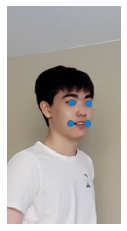

In [34]:
# demonstrate perspective filters
import face_filters_video

plt.axis('off')
plt.imshow(img)

for face in out:
    persp_pts = face_filters_video.get_persp_face_pts(face)
    print(persp_pts)
    plt.scatter(persp_pts[:,0], persp_pts[:,1])

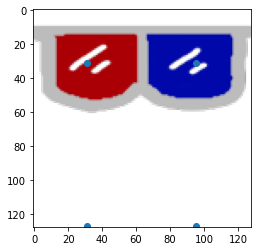

In [37]:
# load persp filter
pe_filt = cv2.cvtColor(cv2.imread('pe_glasses.png', cv2.IMREAD_UNCHANGED), cv2.COLOR_BGRA2RGBA)

plt.imshow(pe_filt) 
plt.scatter([31, 95, 31, 95], [31, 31, 127, 127]) # alignment points

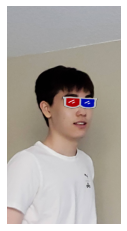

In [39]:
# fit filter to face
filt_pts = np.array([[31, 31], [63, 95], [95, 31]], dtype=np.float32)
p_filt_pts = np.array([[31, 31], [95, 31], [31, 127], [95, 127]], dtype=np.float32)

plt.axis('off')
plt.imshow(img)

for face in out:
    img_pts = np.float32(face_filters_video.get_persp_face_pts(face))
    img_pts = np.round(img_pts)

    M = cv2.getPerspectiveTransform(p_filt_pts, img_pts)
    filtOut = cv2.warpPerspective(pe_filt, M, (img.shape[1], img.shape[0]))

    plt.imshow(filtOut)